In [1]:
import os
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR) 

from common.utils import *
from common.loaders import *
from common.Viewer import *

from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# Loading Data

In [2]:
(x_train, y_train), (x_test, y_test) = load_cifar10()

# how to get a pixel value
# 1: green channel, (12, 13): pixel coordinate, 54: the 55th image
print(x_train[54, 12, 13, 1])

0.36862746


# Building the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


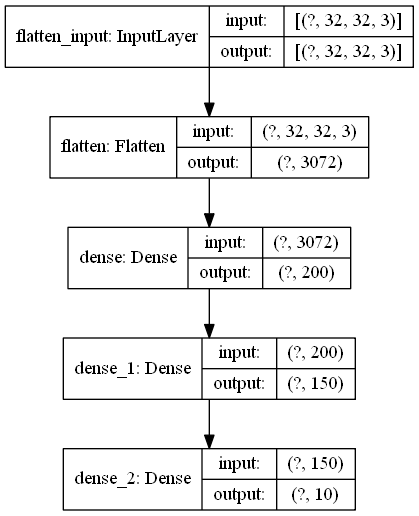

In [3]:
method = 1

if method == 1:

    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(200, activation='relu'),
        Dense(150, activation='relu'),
        Dense(10, activation='softmax')
    ])

elif method == 2:

    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(10, activation='softmax'))

elif method == 3:

    input_layer = Input(shape=(32, 32, 3))
    x = input_layer
    x = Flatten()(x)
    x = Dense(200, activation='relu')(x)
    x = Dense(150, activation='relu')(x)
    output_layer = Dense(10, activation='softmax')(x)
    model = Model(input_layer, output_layer)


%matplotlib inline 

model.summary()

tf.keras.utils.plot_model(
    model, 
    show_shapes=True, 
    show_layer_names=True
)

# 모델이 제대로 플롯되지 않을 경우 다음의 라이브러리 설치 필요
# pip install graphviz보단 conda install graphviz가 작동했음.
# !conda install graphviz
# !pip install pydot

# Compiling the model

In [6]:
opt = Adam(lr=0.0005)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=opt, 
    metrics=['accuracy']
)

# training the model

In [7]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

model.evaluate(x_test, y_test, batch_size=1000)

Epoch 1/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.7681 - accuracy: 0.3677
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.6426 - accuracy: 0.4148
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5722 - accuracy: 0.4401
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5224 - accuracy: 0.4603
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4873 - accuracy: 0.4703
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4539 - accuracy: 0.4849
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4318 - accuracy: 0.4905
Epoch 8/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4097 - accuracy: 0.5009
Epoch 9/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3909 - accuracy: 0.5052
Epoch 10/10
10/10 [==============================] - 0s 38ms/ste

[1.4643518924713135, 0.4860999882221222]

# drawing the result

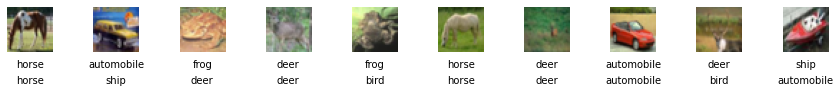

In [8]:
indices = select_indices(len(x_test), 10)
x = select_items(x_test, indices)
y = select_items(y_test, indices)

answer = to_classes(y, 'CIFAR10')

if method == 1:
    predicted = to_classes(model.predict(x), 'CIFAR10')
elif method == 2:
    predicted = to_classes(model.predict_proba(x), 'CIFAR10')
elif method == 3:
    predicted = CIFAR10_CLASSES[model.predict_classes(x)]

viewer = Viewer(num_rows=2, num_cols=10, width=15, height=2)
viewer.add_row(x, answer, predicted)
viewer.show()